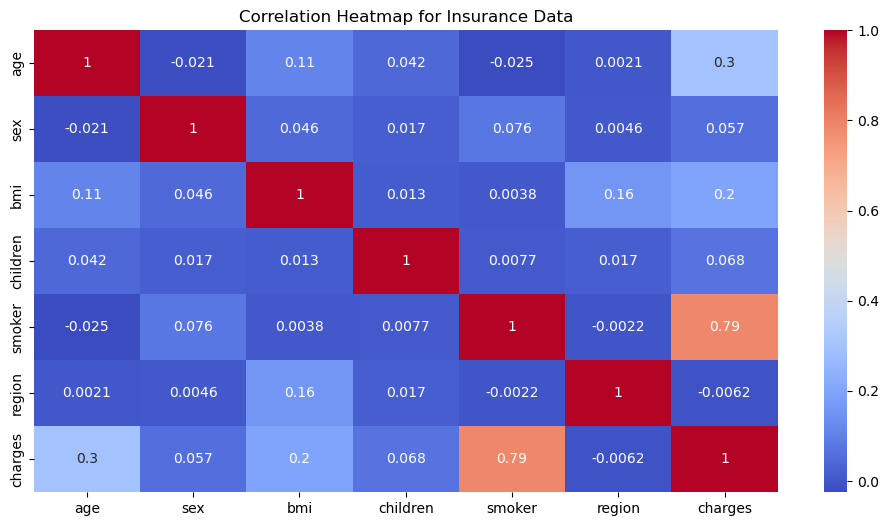

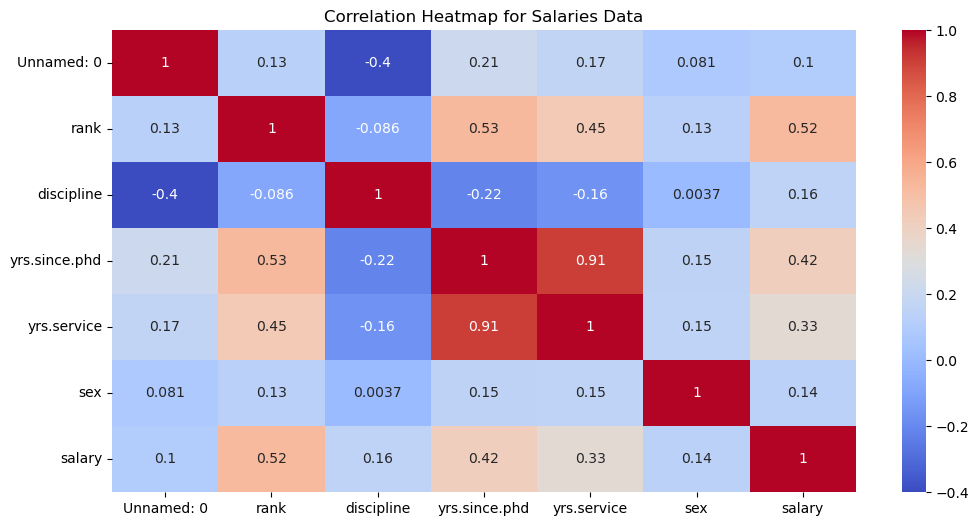

Test Size: 0.3
Coefficients: [  261.62568984   109.64719595   344.54483066   424.37016596
 23620.80252148  -326.46262527]
Intercept: -12364.3913222792
Mean Squared Error: 33805466.89868861



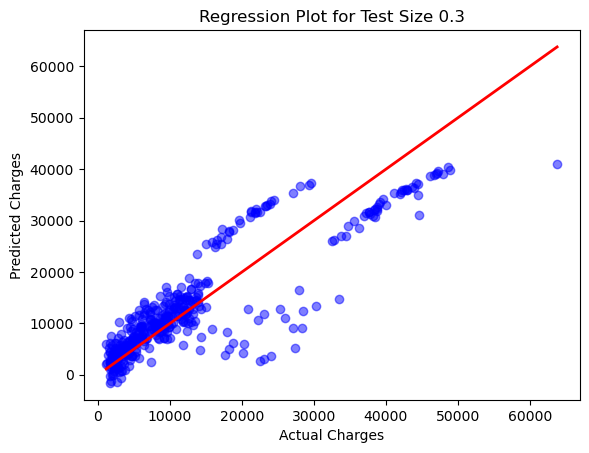

Test Size: 0.4
Coefficients: [  260.28227637   269.58106703   347.48900245   431.90295048
 23403.4667175   -299.38556374]
Intercept: -12564.334341609798
Mean Squared Error: 35513501.260346785



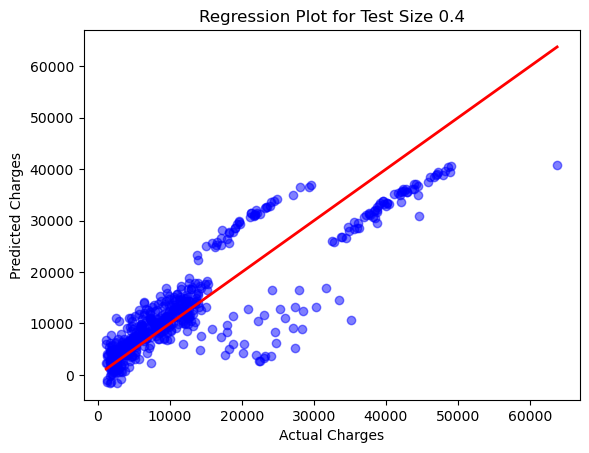

Test Size: 0.5
Coefficients: [  246.85389245    99.77115786   333.17264118   438.99794849
 23271.75369644  -472.28201253]
Intercept: -11168.45599031144
Mean Squared Error: 35238625.04205498



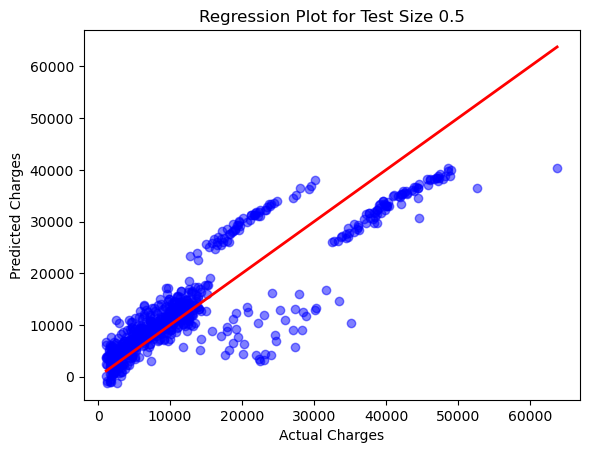

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load datasets
insurance_data = pd.read_csv("insurance.csv")
salaries_data = pd.read_csv("Salaries.csv")

# Encode categorical variables
le = LabelEncoder()
insurance_data['sex'] = le.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = le.fit_transform(insurance_data['smoker'])
insurance_data['region'] = le.fit_transform(insurance_data['region'])

salaries_data['rank'] = le.fit_transform(salaries_data['rank'])
salaries_data['discipline'] = le.fit_transform(salaries_data['discipline'])
salaries_data['sex'] = le.fit_transform(salaries_data['sex'])

# Visualize correlations using heat maps
plt.figure(figsize=(12, 6))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Insurance Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(salaries_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Salaries Data')
plt.show()

# Split data for insurance dataset
X_insurance = insurance_data.drop('charges', axis=1)
y_insurance = insurance_data['charges']

# Split data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_insurance, y_insurance, test_size=size, random_state=42)
    
    # Multiple Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Regression coefficients and intercept
    print(f"Test Size: {size}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}\n")
    
    result=pd.DataFrame({
      'Test Size':size,
        'Coefficients':model.coef_,
        'Intercept': model.intercept_,
        'Mean Squared Error': mean_squared_error(y_test, y_pred)
    })
    
    result.to_excel('D:/230970034_ML/week4MLR1.xlsx',index=False)
    
    # Scatter and Regression plot
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Regression Plot for Test Size {size}')
    plt.show()



Test Size: 0.3
Regression Coefficients: [[-0.07347398 -0.00102359 -0.15534862 -0.00508067 -0.00392773  0.00033461]]
Intercept: [-0.00295627]
Accuracy Score: 0.9353233830845771
Confusion Matrix:
[[311  12]
 [ 14  65]]



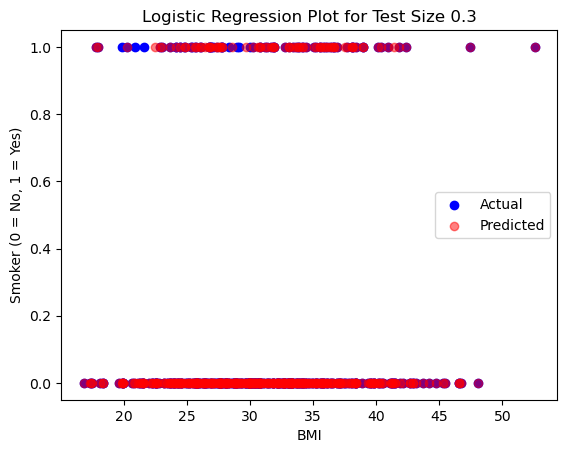

Test Size: 0.4
Regression Coefficients: [[-0.07906294 -0.00120211 -0.16038112 -0.00495857 -0.00581411  0.00035807]]
Intercept: [-0.00304344]
Accuracy Score: 0.9384328358208955
Confusion Matrix:
[[410  20]
 [ 13  93]]



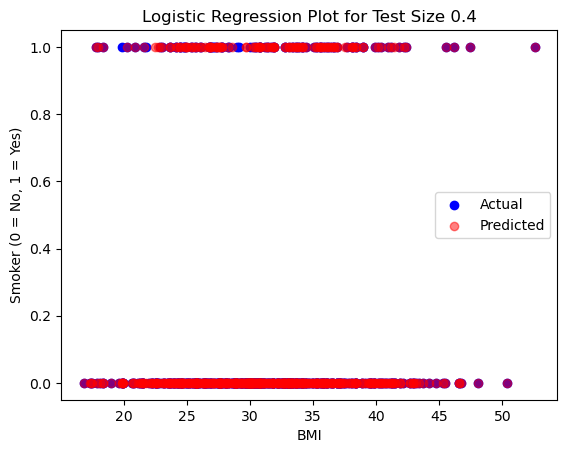

Test Size: 0.5
Regression Coefficients: [[-0.0670673  -0.00147397 -0.17295458 -0.00531163 -0.00509948  0.00034338]]
Intercept: [-0.00357029]
Accuracy Score: 0.9312406576980568
Confusion Matrix:
[[503  20]
 [ 26 120]]



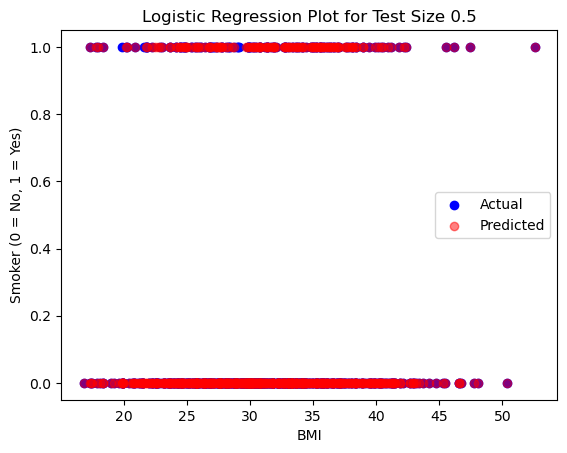

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare Logistic Regression - use a classification target (adjust based on available data)
# Assuming smoker classification based on other features
X_logistic = insurance_data.drop('smoker', axis=1)
y_logistic = insurance_data['smoker']

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=size, random_state=42)
    
    # Logistic Regression Model
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)
    y_pred = log_model.predict(X_test)
    
    # Display results
    print(f"Test Size: {size}")
    print(f"Regression Coefficients: {log_model.coef_}")
    print(f"Intercept: {log_model.intercept_}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    
#     result=pd.DataFrame({
#       'Test Size':size,
#         'Coefficients':log_model.coef_,
#         'Intercept': log_model.intercept_,
#         'Accuracy Score': {accuracy_score(y_test, y_pred)},
#    'Confusion Matrix':{confusion_matrix(y_test, y_pred)}
#     })
    
#     result.to_excel('D:/230970034_ML/week4LogisticR.xlsx',index=False)
    
    # Scatter plot for logistic regression predictions
    plt.scatter(X_test['bmi'], y_test, color='blue', label='Actual')
    plt.scatter(X_test['bmi'], y_pred, color='red', alpha=0.5, label='Predicted')
    plt.xlabel('BMI')
    plt.ylabel('Smoker (0 = No, 1 = Yes)')
    plt.title(f'Logistic Regression Plot for Test Size {size}')
    plt.legend()
    plt.show()


Iteration 0, Cost: 7084215105.170081, Theta: [ 132.70422265 4215.52581692]
Iteration 100, Cost: 3.811168934569455e+198, Theta: [2.76785170e+96 8.82225865e+97]
Iteration 200, Cost: inf, Theta: [6.45201303e+190 2.05651653e+192]
Iteration 300, Cost: inf, Theta: [1.50399937e+285 4.79385203e+286]
Iteration 400, Cost: nan, Theta: [nan nan]
Iteration 500, Cost: nan, Theta: [nan nan]
Iteration 600, Cost: nan, Theta: [nan nan]
Iteration 700, Cost: nan, Theta: [nan nan]
Iteration 800, Cost: nan, Theta: [nan nan]
Iteration 900, Cost: nan, Theta: [nan nan]
Final Parameters (Theta): [nan nan]


C:\Users\mca\AppData\Local\Temp\ipykernel_15924\3642246340.py:13: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
C:\Users\mca\AppData\Local\Temp\ipykernel_15924\3642246340.py:9: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


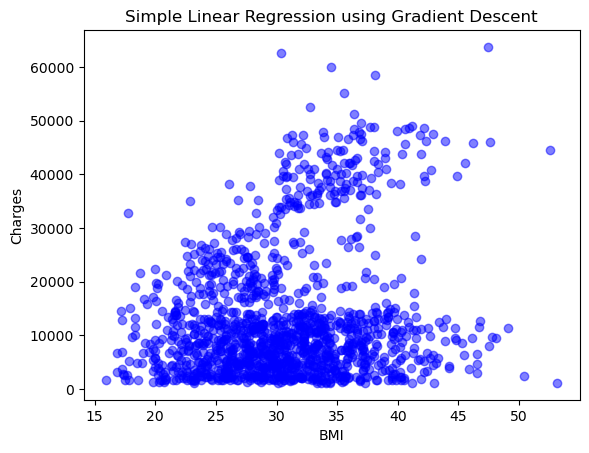

In [4]:
# Gradient Descent for Simple Linear Regression
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]  # Add intercept term
    theta = np.zeros(X.shape[1])  # Initialize parameters
    
    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        
        # Display every 100 iterations
        if i % 100 == 0:
            cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
            print(f"Iteration {i}, Cost: {cost}, Theta: {theta}")
            
    return theta

# Example usage with insurance data (charges vs. bmi)
X = insurance_data['bmi'].values
y = insurance_data['charges'].values
theta = gradient_descent(X, y)

print(f"Final Parameters (Theta): {theta}")
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, theta[0] + theta[1] * X, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Simple Linear Regression using Gradient Descent')
plt.show()


In [5]:
def gradient_descent(X, y, learning_rate=.01, threshold=.80, iterations=1000):
    m = 0
    c = 0

    n = len(X)
    history = []
    for i in range(iterations):
        y_pred = m * X + c

        error = y - y_pred

        m_gradient = -2/n * np.sum((error * X))
        c_gradient = -2/n * np.sum(error)

        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient

        ssr = np.sum((y_pred - np.mean(y)) ** 2)
        sst = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (np.sum((y - y_pred) ** 2) / sst)

        history.append((m, c, r2_score))

        if r2_score > threshold:
            break
        print(f"Iteration: {i}")
        print(f"R2 score: {r2_score}")

    return m, c, history


m, c, history = gradient_descent(X, y)

print(f"\nFinal R2 score: {history[-1][2]}")
print(f"Final m: {m}")
print(f"Final c: {c}")

Iteration: 0
R2 score: -1.2017250070334273
Iteration: 1
R2 score: -427.6877411509143
Iteration: 2
R2 score: -147456.77303816596
Iteration: 3
R2 score: -50835055.14053942
Iteration: 4
R2 score: -17525150583.02044
Iteration: 5
R2 score: -6041714755188.155
Iteration: 6
R2 score: -2082853269080808.8
Iteration: 7
R2 score: -7.18054048611813e+17
Iteration: 8
R2 score: -2.4754581822048266e+20
Iteration: 9
R2 score: -8.534027798731377e+22
Iteration: 10
R2 score: -2.9420666845865445e+25
Iteration: 11
R2 score: -1.0142639068788573e+28
Iteration: 12
R2 score: -3.4966279934668904e+30
Iteration: 13
R2 score: -1.2054463578734645e+33
Iteration: 14
R2 score: -4.155720666955072e+35
Iteration: 15
R2 score: -1.4326655142269175e+38
Iteration: 16
R2 score: -4.939048218462148e+40
Iteration: 17
R2 score: -1.7027140712225146e+43
Iteration: 18
R2 score: -5.870028151379078e+45
Iteration: 19
R2 score: -2.023665105042756e+48
Iteration: 20
R2 score: -6.97649202313552e+50
Iteration: 21
R2 score: -2.4051134166216314

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\mca\AppData\Local\Temp\ipykernel_15924\413491788.py:18: RuntimeWarning: overflow encountered in square
  ssr = np.sum((y_pred - np.mean(y)) ** 2)
C:\Users\mca\AppData\Local\Temp\ipykernel_15924\413491788.py:20: RuntimeWarning: overflow encountered in square
  r2_score = 1 - (np.sum((y - y_pred) ** 2) / sst)
C:\Users\mca\AppData\Local\Temp\ipykernel_15924\413491788.py:15: RuntimeWarning: invalid value encountered in double_scalars
  m -= learning_rate * m_gradient


Iteration 0, Cost: 161323436.79435235, Theta: [ 13.27042227 421.55258169]
Iteration 100, Cost: 70415192.83206113, Theta: [ 18.03393523 430.73386368]
Iteration 200, Cost: 70414994.23399614, Theta: [ 22.48804833 430.59412255]
Iteration 300, Cost: 70414797.13886593, Theta: [ 26.92527569 430.45491117]
Iteration 400, Cost: 70414601.53529672, Theta: [ 31.34568131 430.31622756]
Iteration 500, Cost: 70414407.4120008, Theta: [ 35.74932897 430.1780697 ]
Iteration 600, Cost: 70414214.75777589, Theta: [ 40.1362822  430.04043561]
Iteration 700, Cost: 70414023.56150444, Theta: [ 44.50660428 429.90332329]
Iteration 800, Cost: 70413833.81215307, Theta: [ 48.86035826 429.76673077]
Iteration 900, Cost: 70413645.49877189, Theta: [ 53.19760696 429.63065608]
Iteration 1000, Cost: 70413458.61049391, Theta: [ 57.51841295 429.49509725]
Iteration 1100, Cost: 70413273.1365343, Theta: [ 61.82283856 429.36005234]
Iteration 1200, Cost: 70413089.06618991, Theta: [ 66.1109459  429.22551938]
Iteration 1300, Cost: 704

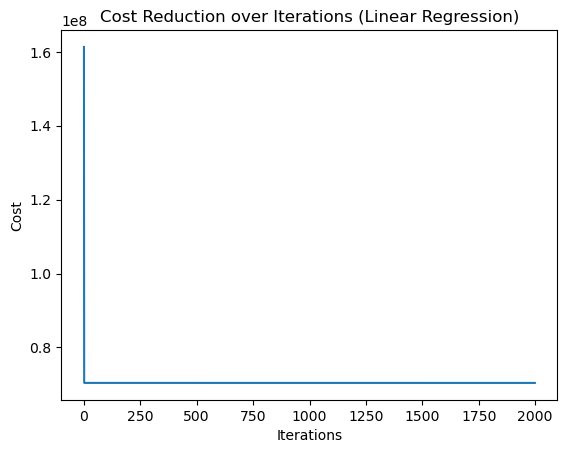

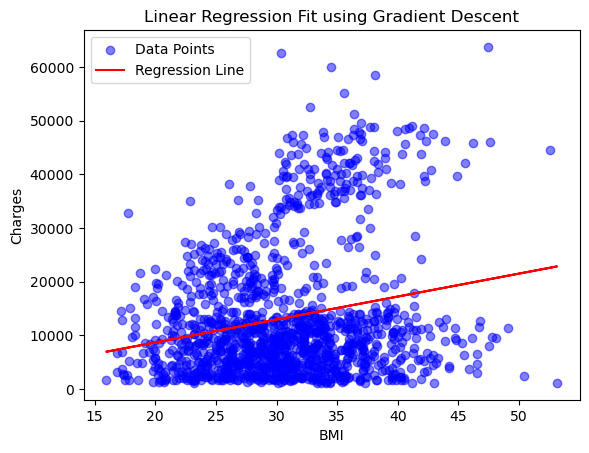

Final Parameters (Theta): [ 99.7942016  428.16875762]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate=0.01, iterations=1000, regression_type='linear'):
    m = len(y)
    X = np.c_[np.ones((m, 1)), X]  # Add intercept term (bias) to the feature matrix
    theta = np.zeros(X.shape[1])   # Initialize parameters to zeros
    cost_history = []              # To track the cost at each iteration

    for i in range(iterations):
        # Compute the hypothesis
        if regression_type == 'linear':
            hypothesis = X.dot(theta)
            error = hypothesis - y
            cost = (1 / (2 * m)) * np.sum(error ** 2)
        elif regression_type == 'logistic':
            hypothesis = 1 / (1 + np.exp(-X.dot(theta)))  # Sigmoid function
            error = hypothesis - y
            cost = -(1 / m) * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
        
        # Store the cost
        cost_history.append(cost)
        
        # Gradient calculation
        gradient = (1 / m) * X.T.dot(error)
        
        # Parameter update
        theta -= learning_rate * gradient
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}, Theta: {theta}")
            
    return theta, cost_history

# insurance_data = pd.read_csv('insurance.csv')

X = insurance_data['bmi'].values.reshape(-1, 1)
y = insurance_data['charges'].values

theta, cost_history = gradient_descent(X, y, learning_rate=0.001, iterations=2000, regression_type='linear')

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations (Linear Regression)')
plt.show()

# Scatter plot with regression line
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, theta[0] + theta[1] * X, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.show()

print(f"Final Parameters (Theta): {theta}")


Iteration 0, Cost: 7084215105.170081, Theta: [ 132.70422265 4215.52581692]
Iteration 100, Cost: 3.811168934569455e+198, Theta: [2.76785170e+96 8.82225865e+97]
Iteration 200, Cost: inf, Theta: [6.45201303e+190 2.05651653e+192]
Iteration 300, Cost: inf, Theta: [1.50399937e+285 4.79385203e+286]
Iteration 400, Cost: nan, Theta: [nan nan]
Iteration 500, Cost: nan, Theta: [nan nan]
Iteration 600, Cost: nan, Theta: [nan nan]
Iteration 700, Cost: nan, Theta: [nan nan]
Iteration 800, Cost: nan, Theta: [nan nan]
Iteration 900, Cost: nan, Theta: [nan nan]
Final Parameters (Theta): [nan nan]


C:\Users\mca\AppData\Local\Temp\ipykernel_15924\1853321431.py:13: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
C:\Users\mca\AppData\Local\Temp\ipykernel_15924\1853321431.py:9: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


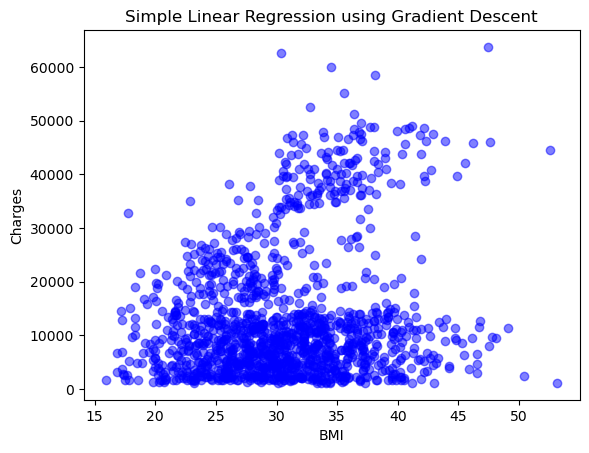

In [7]:
# Gradient Descent for Simple Linear Regression
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]  # Add intercept term
    theta = np.zeros(X.shape[1])  # Initialize parameters
    
    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        
        # Display every 100 iterations
        if i % 100 == 0:
            cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
            print(f"Iteration {i}, Cost: {cost}, Theta: {theta}")
            
    return theta

# Example usage with insurance data (charges vs. bmi)
X = insurance_data['bmi'].values
y = insurance_data['charges'].values
theta = gradient_descent(X, y)

print(f"Final Parameters (Theta): {theta}")
plt.scatter(X, y, color='blue', alpha=0.5)
# plt.plot(X, y_pred, color='red', label='Sklearn Regression Line')  # Plot the regression line from sklearn
plt.plot(X, theta[0] + theta[1] * X, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Simple Linear Regression using Gradient Descent')
plt.show()
